In [18]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct
import sympy as sp

# Filtro com aproximação Butterworth

Calculo de $\epsilon$

$ \epsilon = \sqrt{10^{0.1*1}-1} = 0.508$

In [19]:
np.sqrt(10 ** 0.1 - 1)

0.5088471399095875

Ordem do filtro

$n = \frac{log_{10} (\frac{10^{0.1*35}-1}{\epsilon^2})}{log_{10} (\frac{\omega_S}{\omega_P})^2} = 3.75$

Então, teremos um filtro de ordem 4.\
Pegando da tabela\
$G(s)=\left(s^2 + 0.76537s + 1\right)\left(s^2 + 1.84776s + 1\right)$

Desnormalizando, substituindo 

$s$ por $s(\frac{\epsilon^{1/n}}{\omega_P}) = 0.0001343650s$

In [20]:
s = sp.symbols('s')
poli = np.polymul([1, 0.76537, 1], [1, 1.84776, 1])
poli

array([1.        , 2.61313   , 3.41422007, 2.61313   , 1.        ])

In [21]:
G = s**4 + 2.61313*s**3 + 3.41422*s**2 + 2.61313*s+1
G

s**4 + 2.61313*s**3 + 3.41422*s**2 + 2.61313*s + 1

In [22]:
G = G.subs(s, 0.0001343650*s)
G

3.25945227050488e-16*s**4 + 6.33898151425179e-12*s**3 + 6.16401681798595e-8*s**2 + 0.00035111321245*s + 1

# Função de transferência

In [23]:
H = 1/G
H

1/(3.25945227050488e-16*s**4 + 6.33898151425179e-12*s**3 + 6.16401681798595e-8*s**2 + 0.00035111321245*s + 1)

# Polos da função de transferência

In [24]:
r = sp.solve(G, s)
r

[-6875.89798600958 - 2848.07966614337*I,
 -6875.89798600958 + 2848.07966614337*I,
 -2848.1000789627 - 6875.88953073873*I,
 -2848.1000789627 + 6875.88953073873*I]

In [34]:
coefs = G.as_poly(s).all_coeffs()
coeficientes_array = [float(c) for c in coefs]
sistema = ct.tf([1], coeficientes_array)
sistema

TransferFunction(array([1]), array([3.25945227e-16, 6.33898151e-12, 6.16401682e-08, 3.51113212e-04,
       1.00000000e+00]))

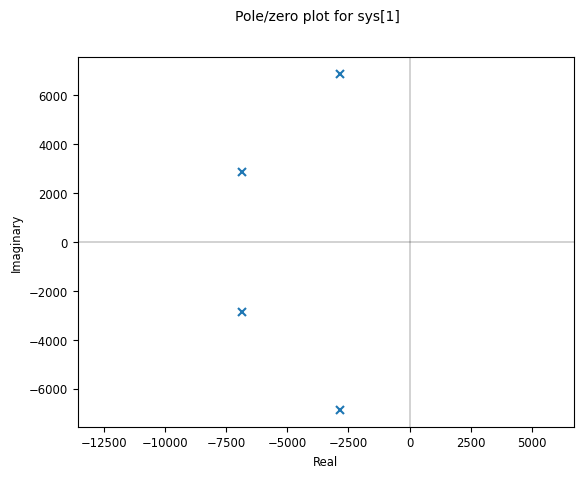

In [35]:
_, _ = ct.pzmap(sistema, plot=True)

# Perda

$A(\Omega) = 10 log_{10} (1+\Omega^{2*4}) $\
\
$\Omega=\frac{9000}{1000}=9$\
\
$A(9)=10 log_{10} (1+9^{2*4}) = 76.33$